<a href="https://colab.research.google.com/github/milieureka/redback-orion/blob/main/Crowd_Monitoring/Small%20object%20detection/batch_training_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Metadata

**Project Name**: Small object dection using YOLOv8 with SAHI  
**Author**: Miley Nguyen  
**Team**: RedBack - Crowd Mornitoring  
**Date**: August 5, 2024


In [ ]:
pip install --upgrade requests==2.32.3


  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inference 0.16.3 requires requests<=2.31.0, but you have requests 2.32.3 which is incompatible.


In [ ]:
#Install library
!pip install -q torch sahi yolov8 ultralytics opencv-python roboflow supervision inference

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.3, but you have requests 2.31.0 which is incompatible.


In [ ]:
pip install --upgrade inference

In [ ]:
import cv2
import supervision as sv
from inference import get_model
import roboflow
from ultralytics import YOLO

In [ ]:
#Import needed lib
#YOLOv8-S model
from sahi.utils.yolov8 import(
    download_yolov8s_model
)

#Import required functions and classes
from sahi import AutoDetectionModel #create model
from sahi.predict import predict #Prediction
from roboflow import Roboflow
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
roboflow.login()

rf = roboflow.Roboflow()
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
dataset = project.version(10).download("yolov8")

You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.81, to fix: `pip install ultralytics==8.0.196`


In [ ]:
ds_train = sv.DetectionDataset.from_yolo(
    images_directory_path=f'{dataset.location}/train/images',
    annotations_directory_path=f'{dataset.location}/train/labels',
    data_yaml_path=f'{dataset.location}/data.yaml'
)
ds_valid = sv.DetectionDataset.from_yolo(
    images_directory_path=f'{dataset.location}/valid/images',
    annotations_directory_path=f'{dataset.location}/valid/labels',
    data_yaml_path=f'{dataset.location}/data.yaml'
)
ds_test = sv.DetectionDataset.from_yolo(
    images_directory_path=f'{dataset.location}/test/images',
    annotations_directory_path=f'{dataset.location}/test/labels',
    data_yaml_path=f'{dataset.location}/data.yaml'
)

len(ds_train), len(ds_valid), len(ds_test)

(250, 43, 19)

In [ ]:
print(ds_train.classes)

['ball', 'goalkeeper', 'player', 'referee']


In [ ]:
ds = sv.DetectionDataset.merge([ds_train, ds_valid, ds_test])

model = YOLO("yolov8x.pt")

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

for i in range(5):
    _, image, annotations = ds[i]

    labels = [ds.classes[class_id] for class_id in annotations.class_id]

    annotated_image = image.copy()
    annotated_image = box_annotator.annotate(annotated_image, annotations)
    annotated_image = label_annotator.annotate(annotated_image, annotations, labels)
    annotated_images.append(annotated_image)

grid = sv.create_tiles(
    annotated_images,
    grid_size=(4, 4),
    single_tile_size=(400, 400),
    tile_padding_color=sv.Color.WHITE,
    tile_margin_color=sv.Color.WHITE
)

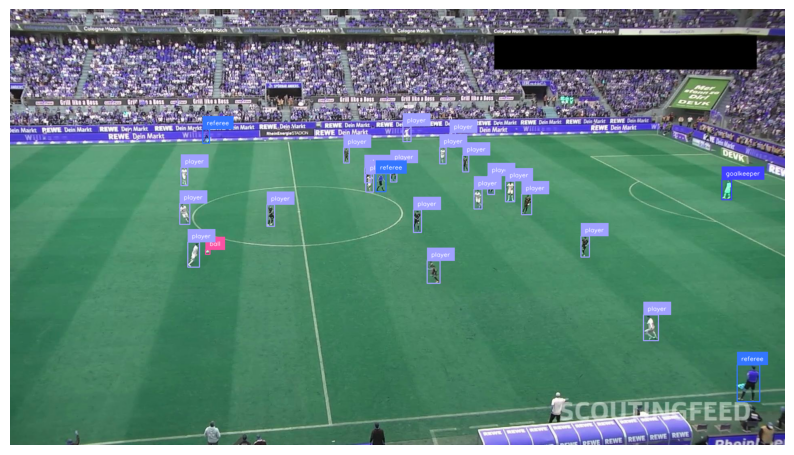

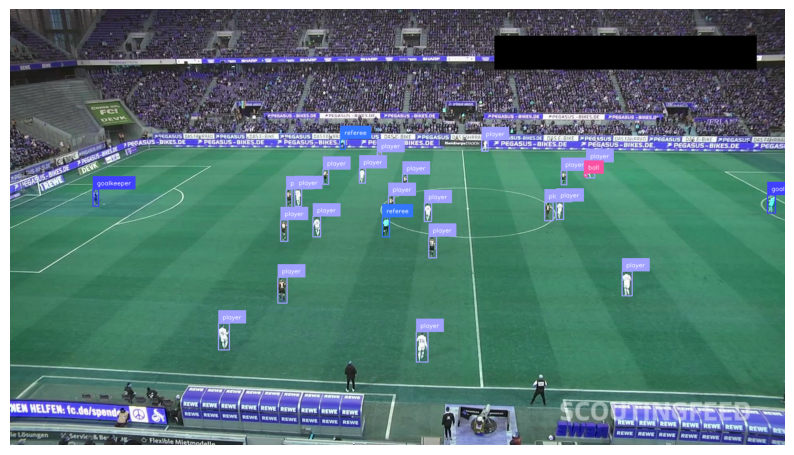

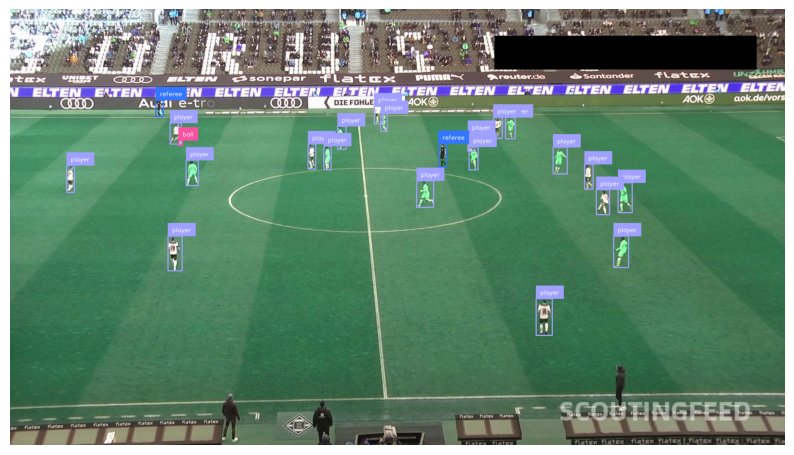

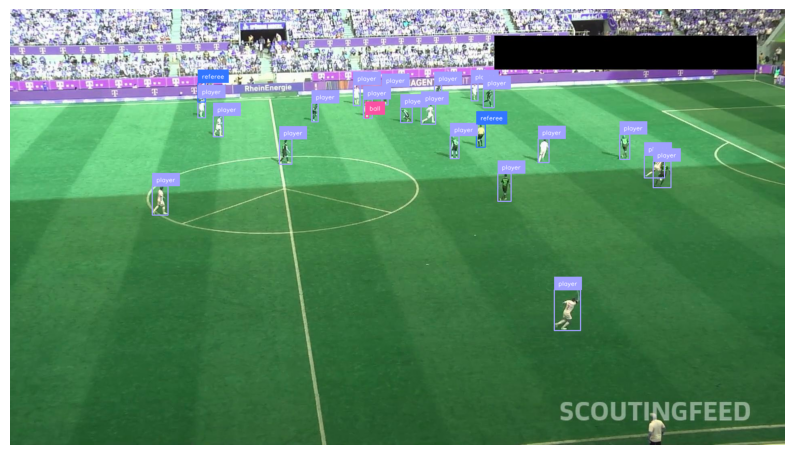

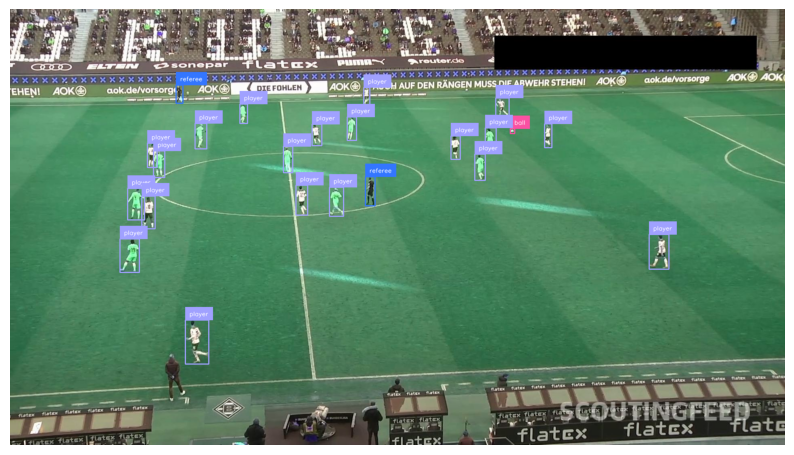

KeyboardInterrupt: 

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt

for img in annotated_images:
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [ ]:
#Download weight YOLOv8, use pretrain model s (light and fast)
yolov8_model_path = 'models/yolov8s.pt'
download_yolov8s_model(yolov8_model_path)

In [ ]:
#Load model
detection_model = AutoDetectionModel.from_pretrained(
    model_type = "yolov8",
    model_path = yolov8_model_path,
    confidence_threshold = 0.2,
    device = "cuda:0"
)

**Batch prediction without SAHI**

Perform standard inference

In [ ]:
results_base = predict(
    detection_model,
    source=ds
)

TypeError: stat: path should be string, bytes, os.PathLike or integer, not DetectionDataset

**Batch prediction with SAHI**

Perform sliced inference by specifying the slice dimensions and overlap ratios

In [ ]:
results = predict(
    detection_model,
    source="/content/football-players-detection-10/test/images",
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
)

There are 19 listed files in folder: images/


Performing inference on images:   0%|          | 0/19 [00:00<?, ?it/s]

Performing prediction on 60 slices.


Performing inference on images:   5%|▌         | 1/19 [00:45<13:35, 45.30s/it]

Prediction time is: 45089.88 ms


Performing inference on images:   5%|▌         | 1/19 [00:45<13:35, 45.30s/it]

Performing prediction on 60 slices.


Performing inference on images:  11%|█         | 2/19 [01:31<12:59, 45.86s/it]

Prediction time is: 46105.49 ms
Performing prediction on 60 slices.


Performing inference on images:  16%|█▌        | 3/19 [02:16<12:09, 45.57s/it]

Prediction time is: 45063.62 ms
Performing prediction on 60 slices.


Performing inference on images:  21%|██        | 4/19 [03:01<11:15, 45.03s/it]

Prediction time is: 44060.11 ms
Performing prediction on 60 slices.


Performing inference on images:  26%|██▋       | 5/19 [03:46<10:34, 45.36s/it]

Prediction time is: 45782.65 ms
Performing prediction on 60 slices.


Performing inference on images:  32%|███▏      | 6/19 [04:31<09:45, 45.07s/it]

Prediction time is: 44345.79 ms
Performing prediction on 60 slices.


Performing inference on images:  37%|███▋      | 7/19 [05:17<09:03, 45.33s/it]

Prediction time is: 45730.87 ms
Performing prediction on 60 slices.


Performing inference on images:  42%|████▏     | 8/19 [06:01<08:14, 44.92s/it]

Prediction time is: 43900.05 ms
Performing prediction on 60 slices.


Performing inference on images:  47%|████▋     | 9/19 [06:45<07:25, 44.56s/it]

Prediction time is: 43635.01 ms
Performing prediction on 60 slices.


Performing inference on images:  47%|████▋     | 9/19 [07:34<07:25, 44.56s/it]

Prediction time is: 48878.47 ms


Performing inference on images:  53%|█████▎    | 10/19 [07:34<06:53, 45.97s/it]

Performing prediction on 60 slices.


Prediction time is: 44548.07 ms


Performing inference on images:  58%|█████▊    | 11/19 [08:19<06:04, 45.60s/it]

Performing prediction on 60 slices.


Performing inference on images:  63%|██████▎   | 12/19 [09:02<05:14, 44.94s/it]

Prediction time is: 43300.61 ms
Performing prediction on 60 slices.


Performing inference on images:  68%|██████▊   | 13/19 [09:49<04:34, 45.73s/it]

Prediction time is: 47313.63 ms


Performing inference on images:  68%|██████▊   | 13/19 [09:50<04:34, 45.73s/it]

Performing prediction on 60 slices.


Performing inference on images:  68%|██████▊   | 13/19 [10:33<04:34, 45.73s/it]

Prediction time is: 43106.07 ms


Performing inference on images:  74%|███████▎  | 14/19 [10:33<03:45, 45.01s/it]

Performing prediction on 60 slices.


Performing inference on images:  79%|███████▉  | 15/19 [11:20<03:03, 45.76s/it]

Prediction time is: 47339.54 ms
Performing prediction on 60 slices.


Performing inference on images:  84%|████████▍ | 16/19 [12:06<02:17, 45.82s/it]

Prediction time is: 45800.89 ms
Performing prediction on 60 slices.


Performing inference on images:  89%|████████▉ | 17/19 [12:52<01:31, 45.67s/it]

Prediction time is: 45183.23 ms
Performing prediction on 60 slices.


Performing inference on images:  89%|████████▉ | 17/19 [13:39<01:31, 45.67s/it]

Prediction time is: 47635.85 ms


Performing inference on images:  95%|█████████▍| 18/19 [13:40<00:46, 46.37s/it]

Performing prediction on 60 slices.


Performing inference on images: 100%|██████████| 19/19 [14:27<00:00, 45.66s/it]

Prediction time is: 47254.14 ms
Prediction results are successfully exported to runs/predict/exp2


In [ ]:
results = predict(
    detection_model,
    source="/content/football-players-detection-10/test/images",
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
    return_dict=True
)

There are 19 listed files in folder: images/


Performing inference on images:   0%|          | 0/19 [00:00<?, ?it/s]

Performing prediction on 60 slices.


Performing inference on images:   5%|▌         | 1/19 [00:44<13:13, 44.10s/it]

Prediction time is: 43943.84 ms
Performing prediction on 60 slices.


Performing inference on images:  11%|█         | 2/19 [01:26<12:16, 43.29s/it]

Prediction time is: 42570.74 ms
Performing prediction on 60 slices.


Performing inference on images:  16%|█▌        | 3/19 [02:08<11:23, 42.70s/it]

Prediction time is: 41842.94 ms
Performing prediction on 60 slices.


Prediction time is: 43107.45 ms


Performing inference on images:  21%|██        | 4/19 [02:52<10:44, 42.94s/it]

Performing prediction on 60 slices.


Performing inference on images:  26%|██▋       | 5/19 [03:33<09:51, 42.23s/it]

Prediction time is: 40827.03 ms
Performing prediction on 60 slices.


Performing inference on images:  32%|███▏      | 6/19 [04:15<09:07, 42.14s/it]

Prediction time is: 41808.57 ms
Performing prediction on 60 slices.


Performing inference on images:  37%|███▋      | 7/19 [04:59<08:32, 42.73s/it]

Prediction time is: 43789.08 ms
Performing prediction on 60 slices.


Performing inference on images:  42%|████▏     | 8/19 [05:41<07:47, 42.50s/it]

Prediction time is: 41884.07 ms
Performing prediction on 60 slices.


Performing inference on images:  47%|████▋     | 9/19 [06:22<07:03, 42.33s/it]

Prediction time is: 41802.03 ms
Performing prediction on 60 slices.


Performing inference on images:  53%|█████▎    | 10/19 [07:06<06:24, 42.75s/it]

Prediction time is: 43546.46 ms
Performing prediction on 60 slices.


Performing inference on images:  58%|█████▊    | 11/19 [07:48<05:39, 42.42s/it]

Prediction time is: 41453.86 ms


Performing inference on images:  58%|█████▊    | 11/19 [07:48<05:39, 42.42s/it]

Performing prediction on 60 slices.


Performing inference on images:  63%|██████▎   | 12/19 [08:28<04:52, 41.85s/it]

Prediction time is: 40327.88 ms


Performing inference on images:  63%|██████▎   | 12/19 [08:28<04:52, 41.85s/it]

Performing prediction on 60 slices.


Performing inference on images:  68%|██████▊   | 13/19 [09:12<04:14, 42.43s/it]

Prediction time is: 43618.96 ms
Performing prediction on 60 slices.


Performing inference on images:  74%|███████▎  | 14/19 [09:54<03:31, 42.27s/it]

Prediction time is: 41749.84 ms
Performing prediction on 60 slices.


Performing inference on images:  79%|███████▉  | 15/19 [10:36<02:48, 42.17s/it]

Prediction time is: 41796.54 ms
Performing prediction on 60 slices.


Performing inference on images:  84%|████████▍ | 16/19 [11:20<02:07, 42.63s/it]

Prediction time is: 43554.36 ms
Performing prediction on 60 slices.


Prediction time is: 41702.55 ms


Performing inference on images:  89%|████████▉ | 17/19 [12:02<01:24, 42.41s/it]

Performing prediction on 60 slices.


Prediction time is: 40553.40 ms


Performing inference on images:  95%|█████████▍| 18/19 [12:42<00:41, 41.91s/it]

Performing prediction on 60 slices.


Performing inference on images: 100%|██████████| 19/19 [13:26<00:00, 42.45s/it]

Prediction time is: 43607.28 ms
Prediction results are successfully exported to runs/predict/exp8


In [ ]:
results

{'export_dir': PosixPath('runs/predict/exp8')}

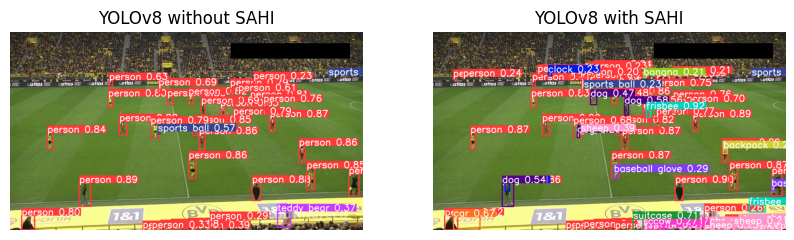

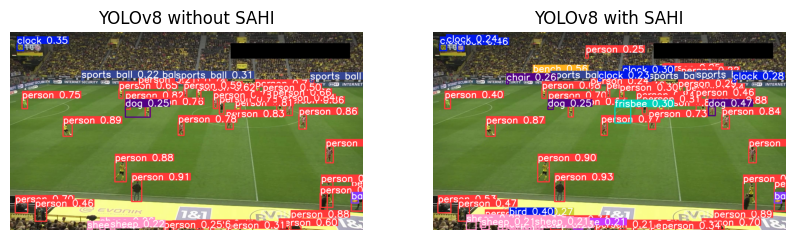

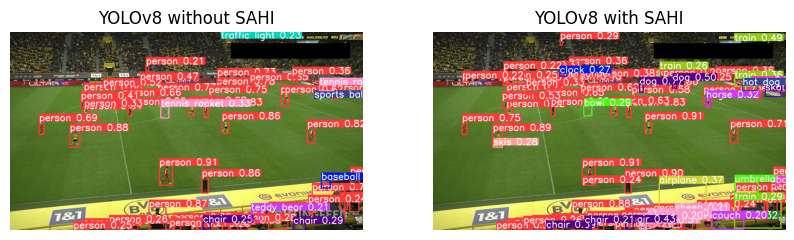

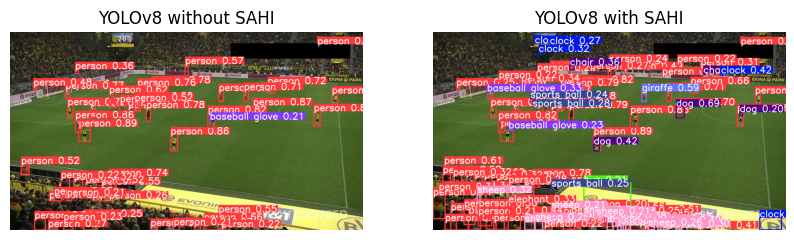

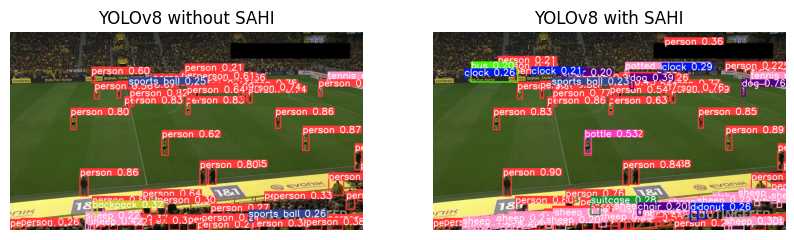

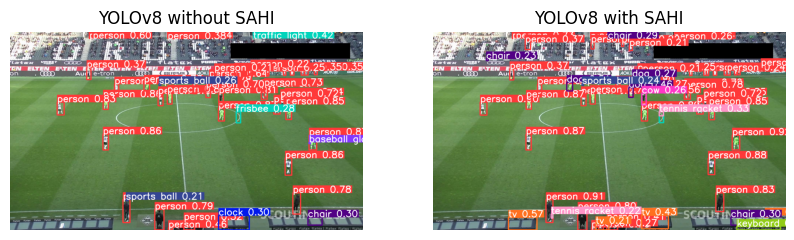

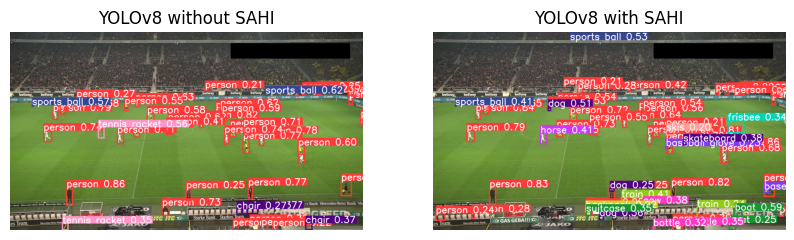

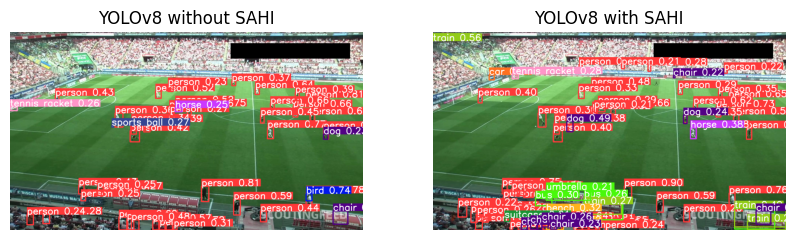

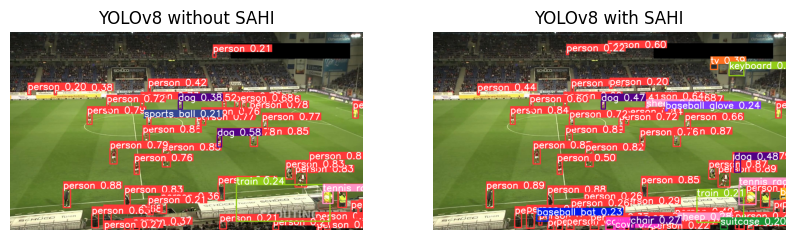

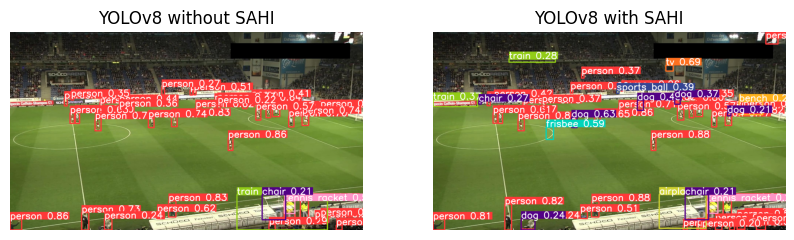

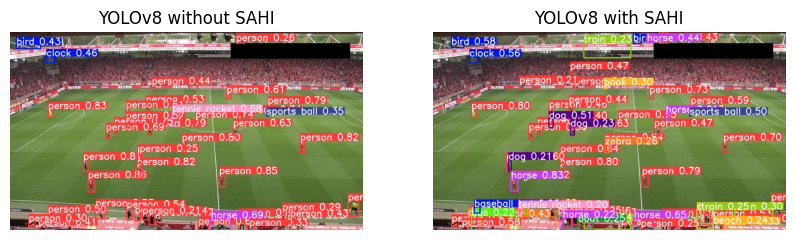

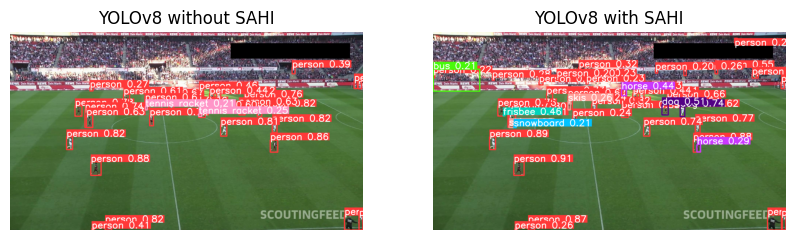

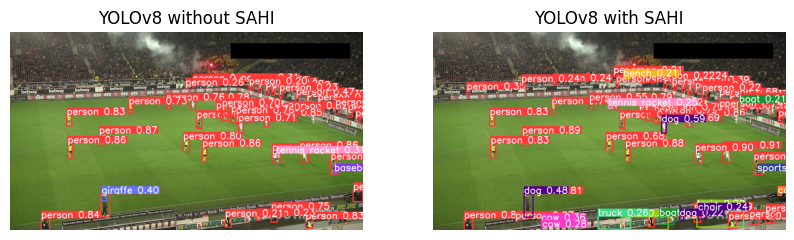

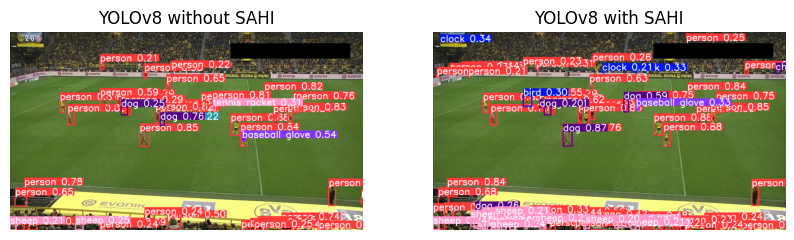

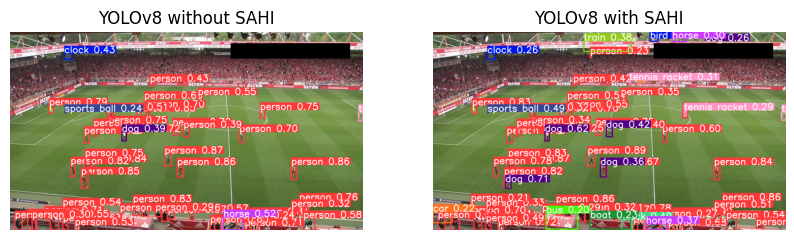

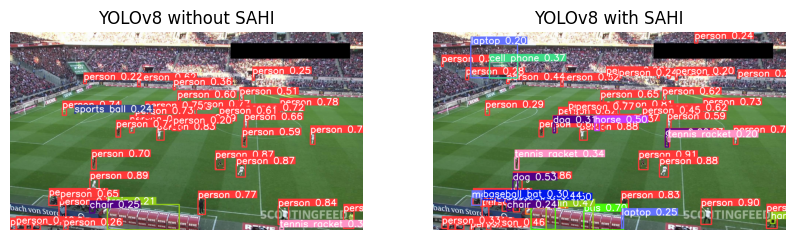

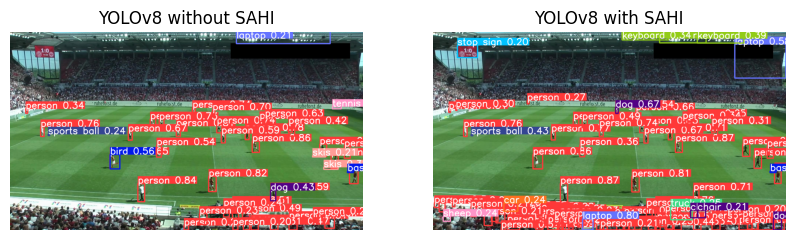

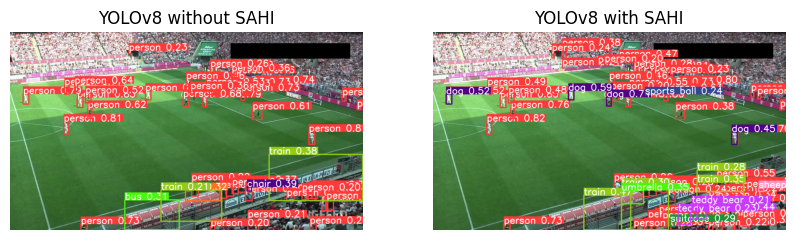

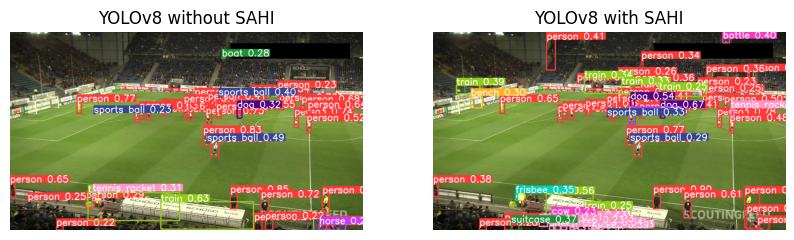

In [ ]:
# Define the paths to the two folders
folder1 = '/content/runs/predict/exp/visuals'
folder2 = '/content/runs/predict/exp2/visuals'

# Get a list of image files from each folder
files1 = [f for f in os.listdir(folder1) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
files2 = [f for f in os.listdir(folder2) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

# Get the maximum number of images to show (the length of the longer list)
max_images = max(len(files1), len(files2))

# Iterate over both lists and display images side by side
for i in range(max_images):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure with 1 row and 2 columns

    # Display image from the first folder, if available
    if i < len(files1):
        img1 = mpimg.imread(os.path.join(folder1, files1[i]))
        axs[0].imshow(img1)
        axs[0].axis('off')
        axs[0].set_title('YOLOv8 without SAHI')
    else:
        axs[0].axis('off')  # Turn off the subplot if no image is available

    # Display image from the second folder, if available
    if i < len(files2):
        img2 = mpimg.imread(os.path.join(folder2, files2[i]))
        axs[1].imshow(img2)
        axs[1].axis('off')
        axs[1].set_title('YOLOv8 with SAHI')
    else:
        axs[1].axis('off')  # Turn off the subplot if no image is available

    plt.show()


# References

1. Marks, J. (2024). *How to Detect Small Objects*. Voxel51. [Link to Article](https://voxel51.com/blog/how-to-detect-small-objects/)
2. Jocher, G. & Rizwan, M. (2023).  *Ultralytics Docs: Using YOLOv8 with SAHI for Sliced Inference*. Ultralytics YOLO Docs. [Link to Article](https://docs.ultralytics.com/guides/sahi-tiled-inference/)

3. Roboflow. (2024). *Football Players Detection Dataset*. Roboflow Universe. Retrieved from [Link to Article](https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc).

In [ ]:
import cv2
import supervision as sv
from ultralytics import YOLO

ModuleNotFoundError: No module named 'supervision'

In [ ]:


model = YOLO("yolov8x.pt")
image = cv2.imread(<SOURCE_IMAGE_PATH>)
results = model(image)[0]
detections = sv.Detections.from_ultralytics(results)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)